In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("D:/Data Science/Machine Learning/Campusx/data/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


[]

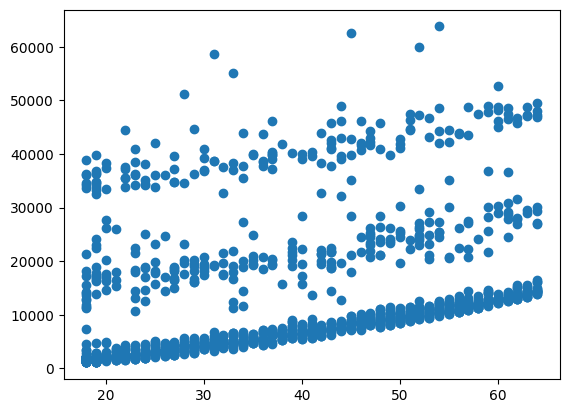

In [4]:
plt.scatter('age','expenses',data=df)
plt.plot()

In [5]:
X = df[['age']]
y = df['expenses']

In [6]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [7]:
y_predict = model.predict(X)


In [8]:
y_predict[:5]

array([ 8062.61492656,  7804.89230873, 10382.11848703, 11670.73157618,
       11413.00895835])

In [9]:
y.values[:5]

array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86])

[]

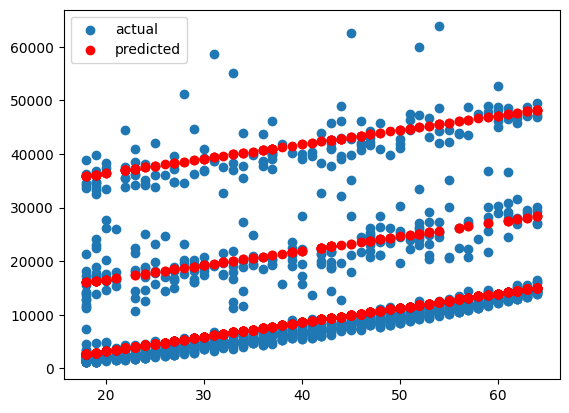

In [58]:
plt.scatter('age','expenses',data=df,label = 'actual')
plt.scatter(df['age'],y_predict,label = 'predicted',color = 'red')
plt.legend()
plt.plot()

In [11]:
1 - np.sum((y - y_predict)**2) / np.sum((y - np.mean(y))**2)

0.08940589905359309

In [12]:
model.score(X,y)

0.08940589905359309

In [13]:
df.groupby('smoker').describe()['expenses']

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268449,5993.781756,1121.87,3986.4425,7345.405,11362.890,36910.61
yes,274.0,32050.231971,11541.547338,12829.46,20826.2450,34456.350,41019.205,63770.43


In [14]:
df.groupby('sex').describe()['expenses']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578897,11128.703817,1607.51,4885.1625,9412.965,14454.690,63770.43
male,676.0,13956.751420,12971.025897,1121.87,4619.1350,9369.615,18989.595,62592.87


In [15]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [16]:
df = pd.get_dummies(data= df,columns=['smoker','sex'],drop_first=True)

In [17]:
df

,age,bmi,children,region,expenses,smoker_yes,sex_male
0,19,27.9,0,southwest,16884.92,1,0
1,18,33.8,1,southeast,1725.55,0,1
2,28,33.0,3,southeast,4449.46,0,1
3,33,22.7,0,northwest,21984.47,0,1
4,32,28.9,0,northwest,3866.86,0,1
...,...,...,...,...,...,...,...
1333,50,31.0,3,northwest,10600.55,0,1
1334,18,31.9,0,northeast,2205.98,0,0
1335,18,36.9,0,southeast,1629.83,0,0
1336,21,25.8,0,southwest,2007.95,0,0


In [18]:
X = df[['age','smoker_yes']]
y = df['expenses']

In [19]:
model.fit(X,y)
y_predict = model.predict(X)

In [20]:
y[:5]

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [21]:
y_predict[:5]

array([26686.23114471,  2556.05515588,  5304.76700617,  6679.12293131,
        6404.25174628])

In [22]:
model.score(X,y)

0.7214008244366957

[]

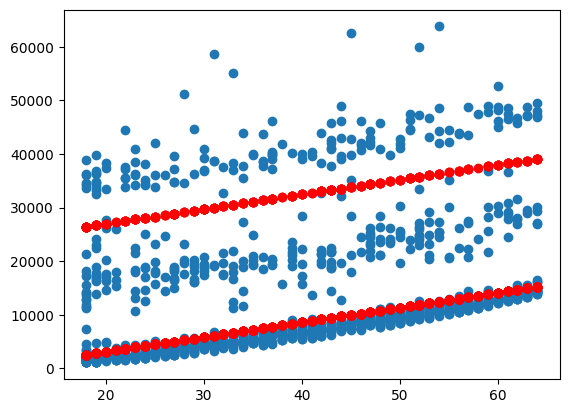

In [23]:
plt.scatter('age','expenses',data=df,label = 'actual')
plt.scatter(df['age'],y_predict,label = 'predicted',color = 'red')
plt.legend
plt.plot()

In [24]:
w,b = model.coef_,model.intercept_

In [25]:
w,b

(array([  274.87118503, 23855.3048038 ]), -2391.6261746335695)

In [26]:
x1 = 19 
x2 = 1

y = w[0]*x1 + w[1]*x2 +b
y

26686.231144714835

In [27]:
df['bmi_30'] = df['bmi'].apply(lambda x : 1 if x >=30 else 0 )

In [28]:
df

,age,bmi,children,region,expenses,smoker_yes,sex_male,bmi_30
0,19,27.9,0,southwest,16884.92,1,0,0
1,18,33.8,1,southeast,1725.55,0,1,1
2,28,33.0,3,southeast,4449.46,0,1,1
3,33,22.7,0,northwest,21984.47,0,1,0
4,32,28.9,0,northwest,3866.86,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,31.0,3,northwest,10600.55,0,1,1
1334,18,31.9,0,northeast,2205.98,0,0,1
1335,18,36.9,0,southeast,1629.83,0,0,1
1336,21,25.8,0,southwest,2007.95,0,0,0


In [29]:
X = df[['age','smoker_yes','bmi_30','sex_male']]
y = df['expenses']

In [30]:
model.fit(X,y)
model.score(X,y)

0.7510803756514601

In [31]:
y_predict = model.predict(X)

[]

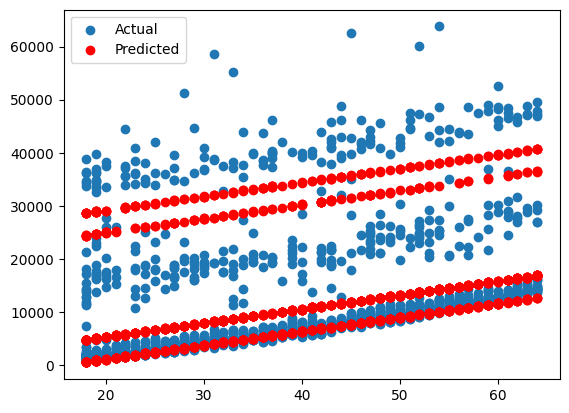

In [32]:
plt.scatter(df['age'],df['expenses'],label = 'Actual')
plt.scatter(df['age'],y_predict,color = 'red', label = 'Predicted')
plt.legend()
plt.plot()

In [33]:
w,b = model.coef_,model.intercept_
w,b

(array([  261.99528597, 23851.62169642,  4197.46919522,  -124.29956169]),
 -4041.1913891127697)

In [34]:
y.values[:5]

array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86])

In [35]:
y_predict[:5]

array([24788.34074066,  4747.89339181,  7367.84625147,  4480.35348608,
        4218.35820011])

In [36]:
model.score(X,y)

0.7510803756514601

In [37]:
1- np.sum((y - y_predict)**2)/np.sum((y - np.mean(y))**2)

0.7510803756514601

In [38]:
df

,age,bmi,children,region,expenses,smoker_yes,sex_male,bmi_30
0,19,27.9,0,southwest,16884.92,1,0,0
1,18,33.8,1,southeast,1725.55,0,1,1
2,28,33.0,3,southeast,4449.46,0,1,1
3,33,22.7,0,northwest,21984.47,0,1,0
4,32,28.9,0,northwest,3866.86,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,31.0,3,northwest,10600.55,0,1,1
1334,18,31.9,0,northeast,2205.98,0,0,1
1335,18,36.9,0,southeast,1629.83,0,0,1
1336,21,25.8,0,southwest,2007.95,0,0,0


In [39]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [40]:
df = pd.read_csv("D:/Data Science/Machine Learning/Campusx/data/insurance.csv")

In [41]:
df[:1]

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92


In [42]:
df = pd.get_dummies(data=df,columns=['smoker'],drop_first=True)

In [43]:
df['bmi_30_smoker'] = df.apply(lambda row : 1 if row.bmi>=30 and row.smoker_yes == 1 else 0 ,axis = 1)
df['bmi_30'] = df['bmi'].apply(lambda x : 1 if x >=30 else 0 )

In [44]:
df[:1]

,age,sex,bmi,children,region,expenses,smoker_yes,bmi_30_smoker,bmi_30
0,19,female,27.9,0,southwest,16884.92,1,0,0


In [45]:
df[df['bmi_30_smoker'] == 1][:1]

,age,sex,bmi,children,region,expenses,smoker_yes,bmi_30_smoker,bmi_30
14,27,male,42.1,0,southeast,39611.76,1,1,1


In [46]:
X = df[['age','smoker_yes','bmi_30_smoker']]
y = df['expenses']

In [47]:
model.fit(X,y)
y_predict = model.predict(X)

In [48]:
model.score(X,y)

0.8584922881543032

In [49]:
1 - np.sum((y-y_predict)**2) / np.sum((y - np.mean(y_predict))**2)

0.8584922881543032

[]

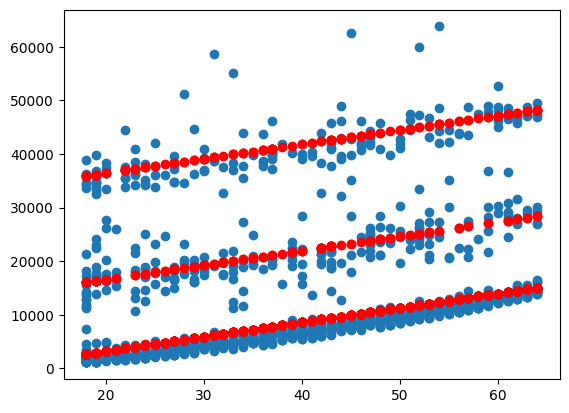

In [50]:
plt.scatter('age','expenses',data = df)
plt.scatter(df['age'],y_predict,color = 'red')
plt.plot()

In [51]:
w,b = model.coef_,model.intercept_
w,b

(array([  268.22050266, 13346.2675514 , 19847.51358178]), -2129.686799215804)

In [52]:
y.values[:5]


array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86])

In [53]:
y_predict[:5]

array([16312.77030267,  2698.28224862,  5380.48727519,  6721.58978848,
        6453.36928582])

In [54]:
print(w.shape)
print(X.shape)


(3,)
(1338, 3)


In [55]:
w.reshape(3,1)

array([[  268.22050266],
       [13346.2675514 ],
       [19847.51358178]])

In [56]:
X.values.dot(w)+b

array([16312.77030267,  2698.28224862,  5380.48727519, ...,
        2698.28224862,  3502.94375659, 27578.03141429])

In [57]:
y_predict

array([16312.77030267,  2698.28224862,  5380.48727519, ...,
        2698.28224862,  3502.94375659, 27578.03141429])